<a href="https://colab.research.google.com/github/DucTran2810/BaiTap_AI/blob/main/Nhan_Dang_Mon_An_BT_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 2s 404ms/step - loss: 9.2038 - acc: 0.1125 - val_loss: 13.8531 - val_acc: 0.1000
Epoch 2/15
2/2 [==============================] - 0s 145ms/step - loss: 11.1076 - acc: 0.1750 - val_loss: 2.3554 - val_acc: 0.2000
Epoch 3/15
2/2 [==============================] - 0s 184ms/step - loss: 2.3981 - acc: 0.1375 - val_loss: 2.4685 - val_acc: 0.1000
Epoch 4/15
2/2 [==============================] - 0s 180ms/step - loss: 2.2526 - acc: 0.2250 - val_loss: 2.4797 - val_acc: 0.0500
Epoch 5/15
2/2 [==============================] - 0s 146ms/step - loss: 2.2290 - acc: 0.4000 - val_loss: 2.3539 - val_acc: 0.0500
Epoch 6/15
2/2 [==============================] - 0s 147ms/step - loss: 2.1713 - acc: 0.2750 - val_loss: 2.5227 - val_acc: 0.1500
Epoch 7/15
2/2 [==============================] - 0s 142ms/step - loss: 2.0706 - acc: 0.3500 - val_loss: 2.3861 - val_acc: 0.1000
Epoch 8/15
2/2 [==============================] - 0s 148ms/step - loss: 1.9227 - acc: 0.3875 - val_

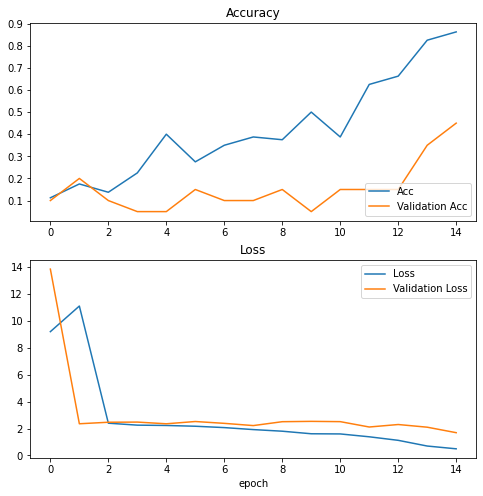

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
# Load Data 
with open('data.Mon_An', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
# Reshape Data
x_pre_0 = x_train[2]
x_pre_1 = x_train[17]
x_pre_2 = x_train[24]
x_pre_3 = x_train[38]
x_pre_4 = x_train[42]
x_pre_5 = x_train[55]
x_pre_6 = x_train[69]
x_pre_7 = x_train[72]
x_pre_8 = x_train[88]
x_pre_9 = x_train[94]
# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255
# Encoding Y
y_train = np_utils.to_categorical(y_train, 10)
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)
f1 = history.history['acc']
val_f1 = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Acc')
plt.plot(val_f1, label='Validation Acc')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.xlabel('epoch')
plt.show()
label = [ 'Banh Chung', 'Banh Day', 'Banh Mi','Bun Dau Mam Tom','Che Buoi','Com Tam','Nem','Pho','Thit Kho Tau','Trung Vit Lon']

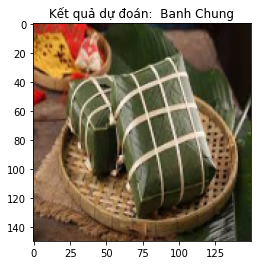

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_0.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_0, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

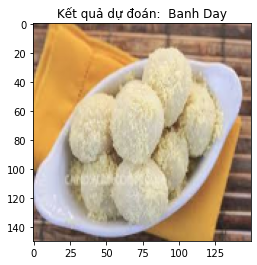

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

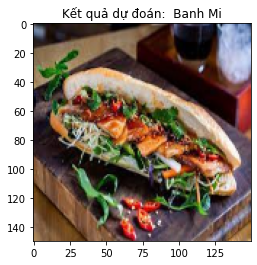

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

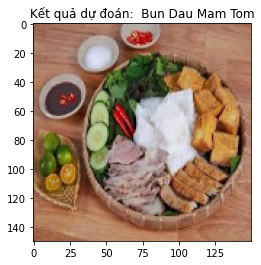

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

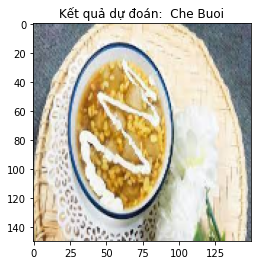

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_4.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_4, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

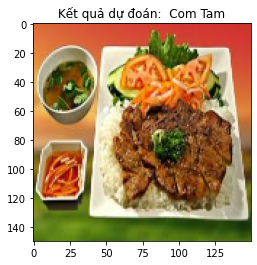

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_5.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_5, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

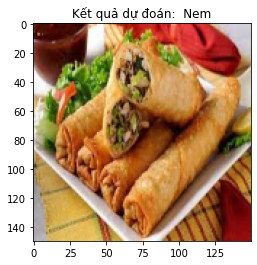

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_6.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_6, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

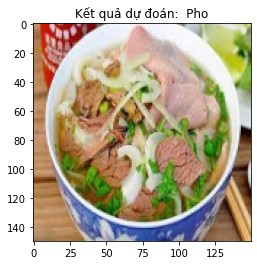

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_7.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_7, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

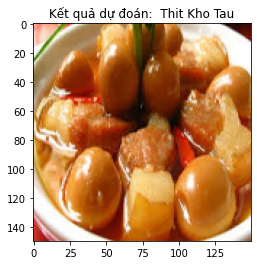

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_8.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_8, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

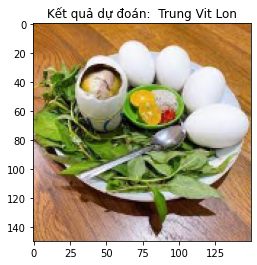

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_9.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_9, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))